In [64]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

In [74]:
# https://www.kaggle.com/dipam7/student-grade-prediction
# P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
df = pd.read_csv('./student-mat.csv', low_memory=False)

In [75]:
df.drop(columns=['school','address','Mjob','Fjob','reason'], inplace=True)
for i in df.index:
    df.loc[i,"sex"] = 0 if df.loc[i,"sex"] == "F" else 1
    df.loc[i,"famsize"] = 0 if df.loc[i,"famsize"] == 'LT3' else 1
    df.loc[i,'Pstatus'] = 0 if df.loc[i,'Pstatus'] == 'A' else 1
    df.loc[i,'guardian'] = 0 if df.loc[i,'guardian'] == 'mother' else 1 if df.loc[i,'guardian'] == 'father' else 2
    df.loc[i,"schoolsup"] = 0 if df.loc[i,"schoolsup"] == 'no' else 1
    df.loc[i,"famsup"] = 0 if df.loc[i,"famsup"] == 'no' else 1
    df.loc[i,"paid"] = 0 if df.loc[i,"paid"] == 'no' else 1
    df.loc[i,"activities"] = 0 if df.loc[i,"activities"] == 'no' else 1
    df.loc[i,"nursery"] = 0 if df.loc[i,"nursery"] == 'no' else 1
    df.loc[i,"higher"] = 0 if df.loc[i,"higher"] == 'no' else 1
    df.loc[i,"internet"] = 0 if df.loc[i,"internet"] == 'no' else 1
    df.loc[i,"romantic"] = 0 if df.loc[i,"romantic"] == 'no' else 1
# df = pd.get_dummies(df)

out = np.where(df['G3'] > 13, 1, 0) # greater than 65% is passing
inp = df.drop(['G3'], axis=1)

# print(df.shape)
# print(out)

In [110]:
def test(X_train, X_test, y_train, y_test, layers, learning_rate):
    mlp = MLPClassifier(hidden_layer_sizes=layers, solver="lbfgs",
                        learning_rate_init=learning_rate, max_iter=1000)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    
#     # plot weights
    plt.figure(figsize=(12, 6), dpi=80)
    plt.scatter(inp.columns, mlp.coefs_[0])
    plt.xticks(rotation = 45)
    
    print(f"layers = {layers}, learning rate = {learning_rate}")
    print(classification_report(y_test, y_pred))
    print(f"\tTraining Accuracy = {mlp.score(X_train, y_train)}")
    print(f"\tTesting Accuracy = {mlp.score(X_test, y_test)}")

layers = (8, 8, 8), learning rate = 0.001
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.85      0.81      0.83        21

    accuracy                           0.91        79
   macro avg       0.89      0.88      0.88        79
weighted avg       0.91      0.91      0.91        79

	Training Accuracy = 1.0
	Testing Accuracy = 0.9113924050632911
layers = (8, 8, 8), learning rate = 0.01
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        58
           1       0.79      0.71      0.75        21

    accuracy                           0.87        79
   macro avg       0.84      0.82      0.83        79
weighted avg       0.87      0.87      0.87        79

	Training Accuracy = 1.0
	Testing Accuracy = 0.8734177215189873
layers = (8, 8, 8), learning rate = 0.1
              precision    recall  f1-score   support

           0       0.96      0.95      0

C:\Users\jtse0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jtse0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


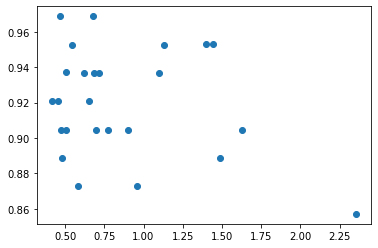

In [109]:
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=.2)

test(X_train, X_test, y_train, y_test, (8,8,8), .001)
test(X_train, X_test, y_train, y_test, (8,8,8), .01)
test(X_train, X_test, y_train, y_test, (8,8,8), .1)
test(X_train, X_test, y_train, y_test, (8,8,8), 1)

train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    MLPClassifier((8,8,8), max_iter=1000), X_train, y_train, cv=5, return_times=True)
plt.scatter(fit_times, test_scores)

In [69]:

# mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), solver='lbfgs', max_iter=1000)
# mlp.fit(X_train, y_train)

# print(f"\tTraining Accuracy = {mlp.score(X_train, y_train)}")
# print(f"\tTesting Accuracy = {mlp.score(X_test, y_test)}")
test(X_train, X_test, y_train, y_test, (2), .1)
test(X_train, X_test, y_train, y_test, (8), .1)
test(X_train, X_test, y_train, y_test, (8,8), .1)
test(X_train, X_test, y_train, y_test, (64,64), .1)
test(X_train, X_test, y_train, y_test, (8,8,8), .1)
test(X_train, X_test, y_train, y_test, (64,64,8), .1)

C:\Users\jtse0\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layers = 2, learning rate = 0.1
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.83      0.71      0.77        21

    accuracy                           0.89        79
   macro avg       0.87      0.83      0.85        79
weighted avg       0.88      0.89      0.88        79

	Training Accuracy = 0.9841772151898734
	Testing Accuracy = 0.8860759493670886
layers = 8, learning rate = 0.1
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.81      0.87        21

    accuracy                           0.94        79
   macro avg       0.94      0.90      0.91        79
weighted avg       0.94      0.94      0.94        79

	Training Accuracy = 1.0
	Testing Accuracy = 0.9367088607594937
layers = (8, 8), learning rate = 0.1
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    